In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [8]:
data_file_1 = pd.read_csv('../data/completed_df.csv')
data_file_2 = pd.read_csv('../data/completed_df_part2.csv')
data_file_1 = pd.get_dummies(data_file_1, columns=['position'], drop_first=True)
batter_data = data_file_1.append(data_file_2)
batter_data = batter_data[batter_data['BA'] <= 1]

In [9]:
batter_data.head()

,Unnamed: 0,playerID,BA,2B/AB,3B/AB,HR/AB,RBI/G,R/G,BB/G,SB/G,...,position_2.0,position_3.0,position_4.0,position_5.0,position_6.0,position_7.0,position_8.0,position_9.0,position_10.0,position_11.0
0,3083,tabatjo01,0.275126,0.050879,0.009422,0.010678,0.247544,0.408644,0.253438,0.092338,...,0,0,0,0,0,0,0,1,0,0
1,2539,preslal01,0.263383,0.035689,0.013562,0.020700,0.246667,0.348889,0.180000,0.066667,...,0,0,0,0,0,1,0,0,0,0
2,2012,mccutan01,0.284697,0.056807,0.007950,0.040245,0.527520,0.602350,0.522573,0.118120,...,0,0,0,0,0,0,1,0,0,0
3,1174,gordode01,0.285937,0.032233,0.014037,0.004679,0.233533,0.530938,0.167665,0.332335,...,0,0,0,0,1,0,0,0,0,0
4,896,ellisma01,0.262458,0.050225,0.004886,0.020520,0.383275,0.480836,0.305226,0.057143,...,0,0,1,0,0,0,0,0,0,0


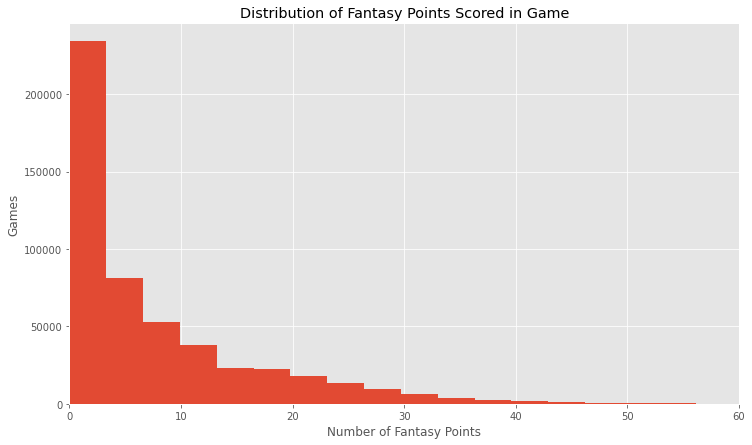

In [10]:
fig, ax = plt.subplots(figsize=(12,7))
ax.hist(batter_data['fantasy_points'], bins=30)
ax.set_title('Distribution of Fantasy Points Scored in Game')
ax.set_xlim(0,60)
ax.set_xlabel('Number of Fantasy Points')
ax.set_ylabel('Games')
fig.savefig('../images/fantasy_point_distribution.jpg');

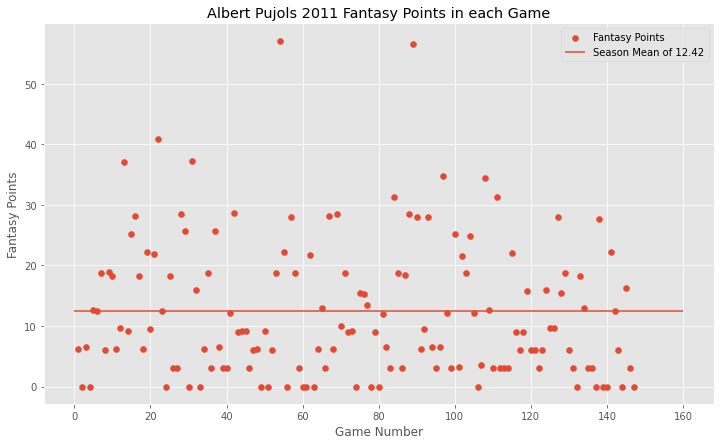

In [32]:
pujols_data = batter_data[batter_data['playerID'] == 'pujolal01']
pujols_data = pujols_data[pujols_data['season'] == 2011]['fantasy_points']
x = list(range(1,pujols_data.shape[0]+1))
pujols_mean = pujols_data.mean()

fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(x, pujols_data, label='Fantasy Points')
ax.hlines(pujols_mean, 0, 160, label=f'Season Mean of {round(pujols_mean, 2)}')
ax.set_xlabel('Game Number')
ax.set_ylabel('Fantasy Points')
ax.set_title('Albert Pujols 2011 Fantasy Points in each Game')
ax.legend()
fig.savefig('../images/albert_pujols_2011_mean.jpg');


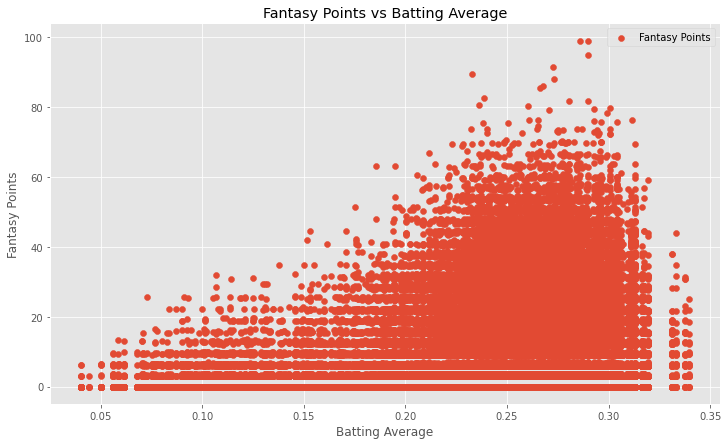

In [19]:
x = batter_data['BA']
y = batter_data['fantasy_points']

fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(x, y, label='Fantasy Points')

ax.set_xlabel('Batting Average')
ax.set_ylabel('Fantasy Points')
ax.set_title('Fantasy Points vs Batting Average')
ax.legend()
fig.savefig('../images/fantasy_points_ba.jpg');


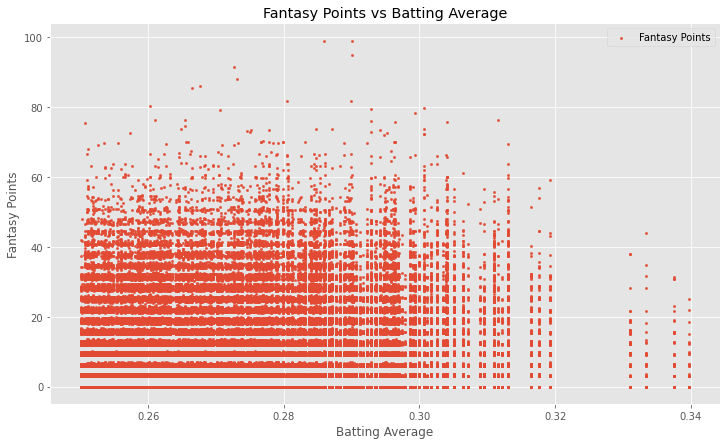

In [26]:
x = batter_data[batter_data['BA'] >.25]['BA']
y = batter_data[batter_data['BA'] >.25]['fantasy_points']

fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(x, y, label='Fantasy Points', s=5)

ax.set_xlabel('Batting Average')
ax.set_ylabel('Fantasy Points')
ax.set_title('Fantasy Points vs Batting Average')
ax.legend()
#fig.savefig('../images/fantasy_points_ba.jpg');

Text(0, 0.5, 'Games')

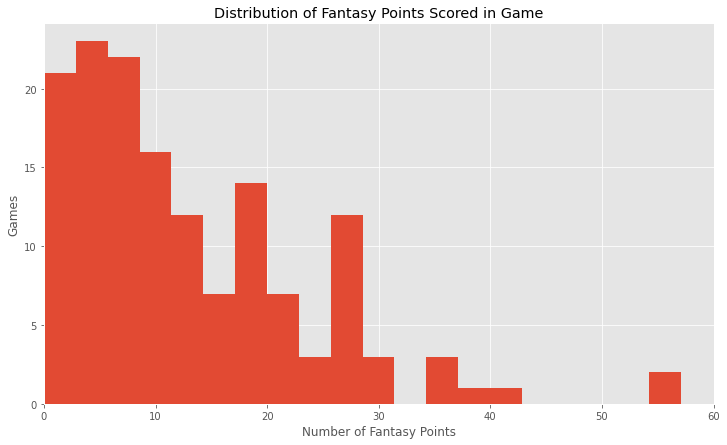